In [201]:
using LightGraphs, GraphPlot, GraphRecipes, Plots, TreeView, AbstractTrees, DataStructures

# Search Tree Optimization With $\alpha, \beta$ Pruning

Isaac Hawn

### A Preliminary Overview of Minimax

The minimax problem is a sub-problem of search tree optimization in which two "players" participate in a game alternating their turns at each depth. One of these players is attempting to maximize a given node and the other is attempting to minimize it, usually on a zero-sum basis. Minimax also assumes that if a decision benefits one player, it is disadvantageous to the other.

In [202]:
function GenerateMinimaxNodes(depth, lst)
    if depth == 1
        push!(lst, randn())
        push!(lst, randn())
        return lst
    else
        lst2 = GenerateMinimaxNodes(depth-1, [])
        push!(lst, lst2)

        lst2 = GenerateMinimaxNodes(depth-1, [])
        push!(lst, lst2)
        
        return lst
    end
end

GenerateMinimaxNodes (generic function with 1 method)

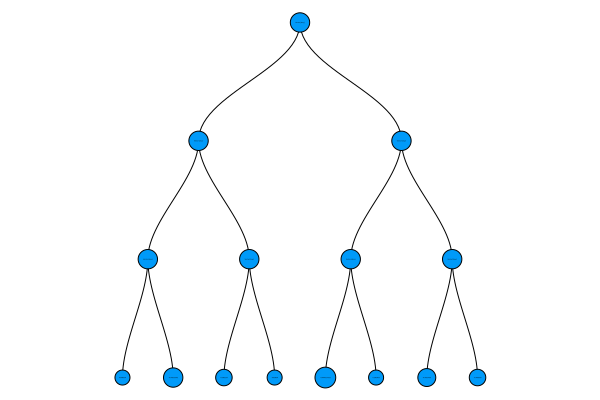

In [203]:
depth = 3
tree = GenerateMinimaxNodes(depth, [])
plot(TreePlot(tree), root=:top, node_shape=:circle, fontsize=1, nodesize=0.2, axis_buffer=0.03)

### Shortcomings of Pure Minimax



In [104]:
[-1, 3, 5, 1, -6, -4, 0, 9]

8-element Vector{Int64}:
 -1
  3
  5
  1
 -6
 -4
  0
  9

In [204]:
function Minimax(tree, depth, isMaximizer)
    if depth == 0
        return tree[1]
    else
        if isMaximizer
            val = -Inf
            for i = 1:length(tree)
                val = max(val, Minimax(tree[i], depth-1, false))
            end
            return val
        else
            val = Inf
            for i = 1:length(tree)
                val = min(val, Minimax(tree[i], depth-1, true))
            end
            return val
        end
    end
end

function Minimax_ab(tree, depth, isMaximizer, α, β)
    if depth == 0
        return tree[1]
    else
        if isMaximizer
            val = -Inf
            i = 1
            while i <= length(tree) && val < β
                val = max(val, Minimax_ab(tree[i], depth-1, false, α, β))
                α = max(α, val)
                i += 1
            end
            return val
        else
            val = Inf
            i = 1
            while i <= length(tree) && val > α
                val = min(val, Minimax_ab(tree[i], depth-1, true, α, β))
                β = min(β, val)
                i += 1
            end
            return val
        end
    end
end

function GenerateMinimaxNodesMulti(depth, lst, child_count)
    if depth == 1
        for i in 1:child_count
            push!(lst, randn())
        end      
        return lst
    else
        for i in 1:child_count
            lst2 = GenerateMinimaxNodes(depth-1, [])
            push!(lst, lst2)   
        end
        return lst
    end
end

GenerateMinimaxNodesMulti (generic function with 1 method)

In [222]:
depth = 15
child_count = 10
tree = GenerateMinimaxNodesMulti(depth, [], child_count)
[@time Minimax(tree, depth, true); @time Minimax_ab(tree, depth, true, -Inf, Inf)]

  0.019979 seconds (491.51 k allocations: 7.500 MiB)
  0.004517 seconds (180.19 k allocations: 2.749 MiB)


2-element Vector{Float64}:
 0.3731399735378648
 0.3731399735378648